In [1]:
import pandas as pd
# 판다스 모듈 임폴트
from sklearn.model_selection import train_test_split
# 데이터셋을 train, test 로 분류
from sklearn.metrics import accuracy_score
# 모델의 정확도 평가
from lightgbm import LGBMClassifier
# lightGBM 모델 사용
from lightgbm import plot_importance
# lightGBM 모델 시각화 모듈
from matplotlib import font_manager, rc
# 
from eli5.lightgbm import *
from eli5.sklearn import *
import eli5
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# 결과값을 상세히 배열로 볼 수 있게 시각화 
from sklearn.metrics import f1_score
# f1_socre 시각화

In [2]:
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
HDOF_DF = pd.read_csv("c:\\data\\HDOF.csv", encoding = 'UTF-8-sig')
HDOF_DF.fillna(0, inplace = True)
HDOF_DF.head()

,사업자번호,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,...,매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,결산연도,결산월,본점_부점,폐업_유무
0,1018100340,2021-12-31,1175030.0,273522.0,37135811.0,993025.0,38310842.0,9494272.0,4901383.0,14395654.0,...,3.497900e+01,1.000000e+12,3243.0,0.0,0.0,0.0,2021,12,1,0
1,1018100772,2021-12-31,549804.0,0.0,21237198.0,21231948.0,21787002.0,3733712.0,12704550.0,16438262.0,...,1.000000e+12,1.000000e+12,517157.0,337407.0,0.0,0.0,2021,12,1,0
2,1018101126,2021-12-31,1798623.0,115892.0,35555977.0,34136073.0,37354601.0,9435217.0,3258245.0,12693461.0,...,2.682400e+01,1.000000e+12,910.0,1506709.0,1.0,0.0,2021,12,1,0
3,1018101242,2021-12-31,543038.0,114573.0,24420419.0,21795940.0,24963457.0,6684822.0,1956000.0,8640822.0,...,1.439400e+01,1.000000e+12,0.0,1103070.0,0.0,0.0,2021,12,1,0
4,1018103819,2021-12-31,1608654.0,18608.0,11514039.0,11063056.0,13122693.0,6404524.0,1621901.0,8026426.0,...,2.099600e+01,1.000000e+12,0.0,0.0,0.0,0.0,2021,12,1,0


In [4]:
HDOF_DF.drop(['사업자번호', '결산년월', '결산연도', '결산월'], axis = 1, inplace = True)
# 위 컬럼들을 drop

In [5]:
n_columns = HDOF_DF.columns.difference(["폐업_유무"])
x = HDOF_DF[n_columns]
y = HDOF_DF["폐업_유무"]

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify = y)

In [6]:
model = LGBMClassifier()
model.fit(train_x, train_y)

LGBMClassifier()

In [16]:
pred = model.predict(test_x)

accuracy = accuracy_score(pred, test_y)
f1 = f1_score(pred, test_y)
confusion = confusion_matrix(pred, test_y)

print("오차행렬:")
print(confusion)
print(f'f1_score: {f1}')
print(f'정밀도: {accuracy}')


오차행렬:
[[7107  362]
 [ 138 1321]]
f1_score: 0.8408656906429027
정밀도: 0.9439964157706093


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

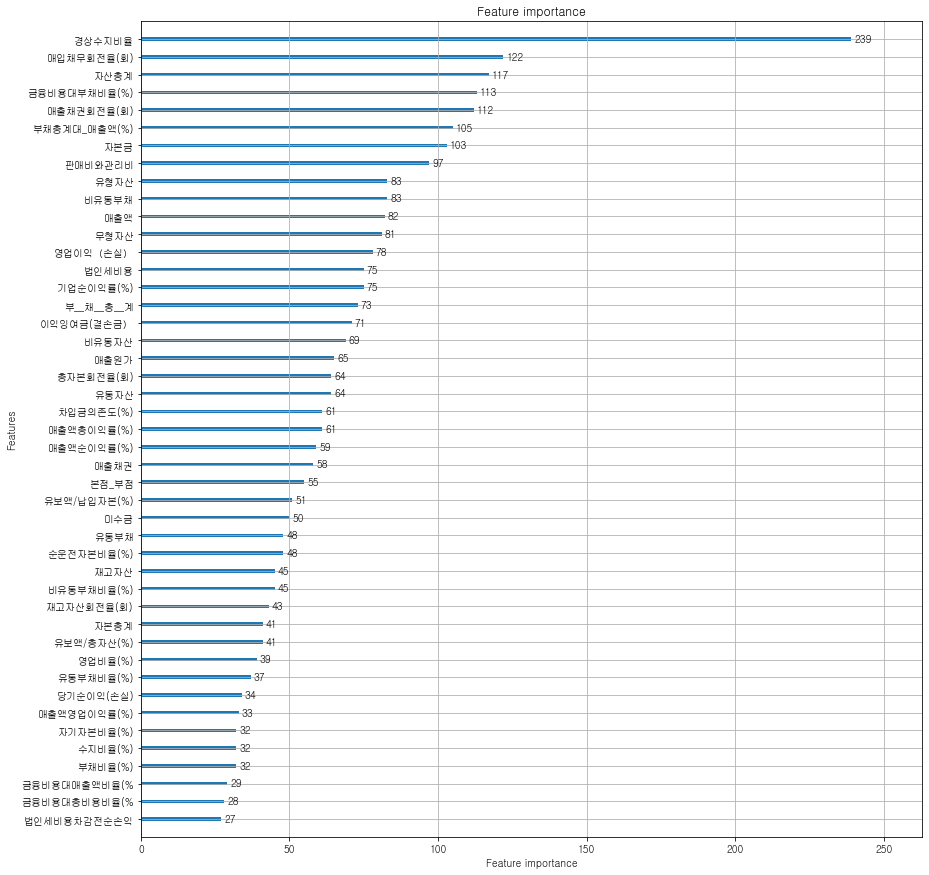

In [17]:
fig, ax = plt.subplots(figsize=(14, 15))
plot_importance(model, ax = ax)

In [ ]:
print(dateset.